# Fig 6
___

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Phylo
from scipy.stats import ttest_ind


In [1]:
proline_tree_path = "../data/20241008_proline_tree_updated.nwk"
repulsion_tree_path = "../data/20240813_repulsion_mutant_tree.nwk"

data_csv = "../data/adk_ortholog_dataset_km_filtered.csv"
lidtype_msa_path = "../data/20240717_adk_msa_temp_kcat.csv"

# Proline Box Plot

In [3]:
lidtype_msa_df = pd.read_csv(lidtype_msa_path, index_col=0)

In [4]:
lidtype_msa_df 

,org_name,0,1,2,3,4,5,6,7,8,...,494,495,496,497,498,c4_motif,kcat_mean_normed,temperature,lid_type,org_in_first_lib
0,desulfovibrio_desulfuricans,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,CNCC,733.474277,31,zinc-like,True
1,azorhizobium_caulinodans,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,EA--,20.287820,30,lidless,True
2,methylocella_silvestris,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,EA--,123.061061,23,lidless,True
3,bartonella_henselae,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,EI--,77.856752,37,lidless,True
4,sorangium_cellulosum,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,DS--,12.518474,28,lidless,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,zunongwangia_profunda,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,T---,NaN,28,lidless,False
5146,zymobacter_palmae,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,HSDT,NaN,26,hbond_like,False
5147,zymomonas_mobilis,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCC,NaN,30,zinc-like,False
5148,mycoplasma_mobile,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,CCCH,88.316547,26,zinc-like,True


In [5]:
lidtype_msa_df = lidtype_msa_df.dropna(subset=["kcat_mean_normed"])
hbond_df = lidtype_msa_df[lidtype_msa_df["lid_type"] == "hbond_like"]

In [ ]:
#279, 284
#hbond_df[["org_name", "279", "280", "281", "282", "283", "284"]]
hbond_df["is_pro_283"] = hbond_df["283"].apply(lambda x: 1 if x == "P" else 0)

/var/folders/xh/t0b9z1yd61b4nh7hrj1zy0440000gn/T/ipykernel_46062/3237457323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbond_df["is_pro_283"] = hbond_df["283"].apply(lambda x: 1 if x == "P" else 0)
/var/folders/xh/t0b9z1yd61b4nh7hrj1zy0440000gn/T/ipykernel_46062/3237457323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbond_df["is_pro_280"] = hbond_df["280"].apply(lambda x: 1 if x == "P" else 0)
/var/folders/xh/t0b9z1yd61b4nh7hrj1zy0440000gn/T/ipykernel_46062/3237457323.py:5: SettingWithCopyW

TtestResult(statistic=-3.1622740977589285, pvalue=0.0031214786798772114, df=37.0)


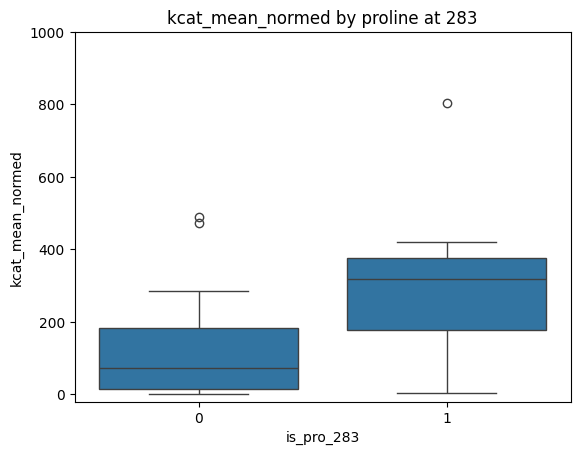

In [286]:
# boxplot hbond_df kcat_mean_normed by proline at 283
plt.figure()
sns.boxplot(x="is_pro_283", y="kcat_mean_normed", data=hbond_df)
plt.title("kcat_mean_normed by proline at 283")
print(ttest_ind(hbond_df[hbond_df["is_pro_283"] == 0]["kcat_mean_normed"], hbond_df[hbond_df["is_pro_283"] == 1]["kcat_mean_normed"]))
plt.rcParams['pdf.fonttype'] = 42
plt.ylim(-20, 1000)
plt.savefig("../data/fig_pdfs/proline_128_boxplot.pdf")

## proline boxplot
___

In [7]:
df = pd.read_csv("/Users/duncanmuir/Desktop/20240729_proline_repulsion_mutants.csv")
org_names = ["_".join(i.split("_")[:2]).lower() for i in df["id"]]
df["org_name"] = org_names
mutants = [i.split("_")[-1] for i in df["id"]]
df["mutant"] = mutants

In [8]:
proline_df = df.copy()
proline_df = proline_df[(proline_df["mutant"].str.contains("P")) | (proline_df["mutant"] == "WT")]

In [9]:
org_mutants = []
fcs = []
fc_errors = []
for org, subset in proline_df.groupby("org_name"):
    if "WT" not in subset["mutant"].values:
        continue
    for mutant in subset["mutant"]:
        if mutant != "WT":
            wt_mean = subset[subset["mutant"] == "WT"]["kcat_mean_normed"].values[0]
            wt_std = subset[subset["mutant"] == "WT"]["kcat_std_normed"].values[0]
            mut_mean = subset[subset["mutant"] == mutant]["kcat_mean_normed"].values[0]
            mut_std = subset[subset["mutant"] == mutant]["kcat_std_normed"].values[0]

            if mutant[0] == "P":
                ratio = wt_mean / mut_mean
                error = ratio * np.sqrt((wt_std/wt_mean)**2 + (mut_std/mut_mean)**2)
                org_mutants.append(org+"_"+mutant[-1]+mutant[1:-1]+mutant[0])
            else:
                ratio = mut_mean / wt_mean
                error = ratio * np.sqrt((wt_std/wt_mean)**2 + (mut_std/mut_mean)**2)
                org_mutants.append(org+"_"+mutant)
            fc = ratio
            
            fcs.append(np.log2(fc))
            fc_errors.append(error)
            

In [10]:
proline_fc_df = pd.DataFrame({"org_mutant": org_mutants, "fc": fcs, "fc_error": fc_errors})
proline_fc_df["org_name"] = [i[:-6] for i in proline_fc_df["org_mutant"]]

In [11]:
tree = Phylo.read(proline_tree_path, "newick")

# add all terminal nodes to a list
terminals = []
lid_types = []
for clade in tree.find_clades():
    if clade.is_terminal():
        if clade.name[:3] == "sym":
            terminals.append("sym_therm")
        else: 
            terminals.append(clade.name[0] + "_" + clade.name.split("_")[1][:4])
        if clade.name == "colwellia_psychrerythraea":
            lid_types.append("hbond_like")
        else:
            lid_types.append(lidtype_msa_df[lidtype_msa_df["org_name"] == clade.name]["lid_type"].values[0])

In [12]:
supp_exclusions = ["b_subt_S131P", "c_japo_E127P"]
proline_fc_df = proline_fc_df[~proline_fc_df["org_mutant"].isin(supp_exclusions)]

In [13]:
# sort activity df to match terminals
tree_df = proline_fc_df.copy().set_index("org_name")
tree_df = tree_df.loc[[i.lower() for i in terminals]]
tree_df.reset_index(inplace=True)
tree_df["lid_type"] = lid_types

In [14]:
tree_df

,org_name,org_mutant,fc,fc_error,lid_type
0,p_atla,p_atla_A127P,1.492408,1.127540,hbond_like
1,c_psyc,c_psyc_G128P,0.781758,1.263403,hbond_like
2,a_medi,a_medi_A127P,0.813540,0.764233,hbond_like
3,h_somn,h_somn_A127P,0.691175,0.393433,hbond_like
4,a_pleu,a_pleu_A128P,0.281516,0.200914,hbond_like
5,s_frig,s_frig_G128P,0.803586,0.338193,hbond_like
6,s_loih,s_loih_A127P,0.664838,0.303287,hbond_like
7,n_gono,n_gono_A128P,0.202448,0.237499,hbond_like
8,a_bayl,a_bayl_A127P,1.907621,0.427647,hbond_like
9,c_japo,c_japo_A128P,1.244117,0.460746,hbond_like


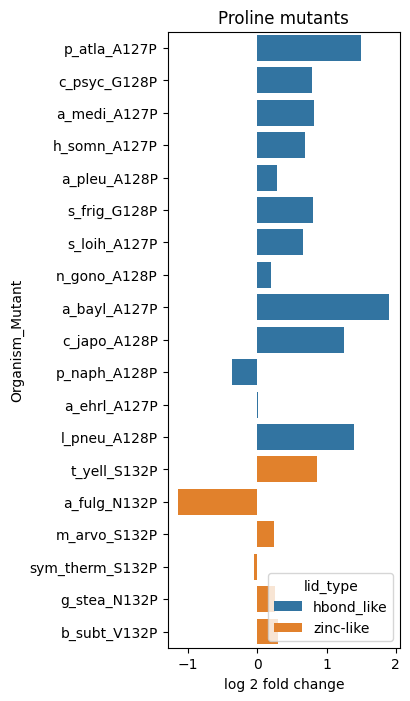

In [15]:
# vertical bar plot with 
plt.figure(figsize=(3, 8))
sns.barplot(data=tree_df, x="fc", y="org_mutant", hue="lid_type")
plt.xlabel("log 2 fold change")
plt.ylabel("Organism_Mutant")
plt.title("Proline mutants")
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("../data/fig_pdfs/proline_barplot.pdf")